# Apache Spark Koalas (ya sustituido a Pandas)

Este notebook contiene las funciones principales de Koalas, obtenidas de la documentación oficial de https://koalas.readthedocs.io/

### <font color = #ff4fa4> <i> Descargamos las librerías

In [76]:
##!pip install plotly
##!pip install koalas

In [77]:
import sys
sys.executable

'C:\\Users\\HP\\anaconda3\\envs\\Process_Big_Data\\python.exe'

### <font color = #ff4fa4> <i> Con !pip list verificamos todas las librerías instaldas al momento

In [78]:
!pip list

Package                           Version
--------------------------------- --------------
annotated-types                   0.7.0
anyio                             4.2.0
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
asttokens                         2.4.1
async-lru                         2.0.4
attrs                             24.2.0
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.12.3
bleach                            4.1.0
bokeh                             2.4.3
Brotli                            1.0.9
certifi                           2024.8.30
cffi                              1.17.1
charset-normalizer                3.3.2
colorama                          0.4.6
comm                              0.2.2
contourpy                         1.1.1
cycler                            0.12.1
dacite                            1.8.1
debugpy           

### <font color = #ff4fa4> <i> El error arrojado al correr el bloque se soluciona llamando a la función pyspark.pandas. Koalas se pasa a pandas de pyspark

In [79]:
import findspark
findspark.init()
import pyspark.pandas as ps
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession
from PIL import Image
import pandas_bokeh
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

### 1. Creación de objetos



### <font color = #ff4fa4> <i> Muchas de las líneas fueron modificadas de Koalas a Pandas de PySpark

### <font color = #cc0000> <i> <b> Instead of working on your local machine's memory (like pandas does), pyspark.pandas executes operations in a distributed manner on Spark.
### <font color = #cc0000> <i> <b> This means it can handle big data that would not fit into your local memory.

In [80]:
# Path to your image
image_path = "The_most_simpel_and_necessary_to_initialize_Spark.jpg"
# Open and display the image
img = Image.open(image_path)
img.show()  # Opens the image in the default viewer

Creando una serie Koalas pasando una lista de valores, permitiendo que Koalas cree un índice entero predeterminado:

In [81]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [82]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### <font color = #ff4fa4> <i> Creando un Ps DataFrame pasando un dict de objetos que se pueden convertir a series.

In [83]:
kdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [84]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creando un DataFrame de pandas pasando una matriz numpy, con un índice de fecha y hora y columnas etiquetadas:

In [85]:
dates = pd.date_range('20130101', periods=6)

In [86]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [87]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [88]:
pdf

,A,B,C,D
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962
2013-01-02,-1.893615,0.213294,0.001205,-0.817089
2013-01-03,0.659246,0.937570,-1.607560,-0.762725
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826
2013-01-05,-0.264515,-2.003862,0.635418,-1.239258
2013-01-06,0.059933,0.277377,1.360659,-1.308820


### <font color = #ff4fa4> <i> Ahora, este DataFrame de pandas se puede convertir en un DataFrame de pandas PySpark

In [89]:
kdf = ps.from_pandas(pdf)

In [90]:
type(kdf)

pyspark.pandas.frame.DataFrame

Sin embargo, se ve y se comporta igual que un DataFrame de pandas

In [91]:
kdf

,A,B,C,D
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962
2013-01-02,-1.893615,0.213294,0.001205,-0.817089
2013-01-03,0.659246,0.937570,-1.607560,-0.762725
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826
2013-01-05,-0.264515,-2.003862,0.635418,-1.239258
2013-01-06,0.059933,0.277377,1.360659,-1.308820


Además, es posible crear un **Pandas DataFrame desde Spark DataFrame**.

Creando un Spark DataFrame a partir de pandas DataFrame

In [92]:
spark = SparkSession.builder.getOrCreate()

In [93]:
sdf = spark.createDataFrame(pdf)

In [94]:
sdf.show()

+--------------------+--------------------+--------------------+--------------------+
|                   A|                   B|                   C|                   D|
+--------------------+--------------------+--------------------+--------------------+
| -0.6751782749743815|-0.14451867071551783| -0.7924199209999613| -0.3079615296390403|
| -1.8936146669537857| 0.21329370737293857|0.001205475362224...| -0.8170886310681906|
|  0.6592456684324051|  0.9375701376265584| -1.6075598643689741| -0.7627247785662142|
| -0.7691423497872982| -0.9399031011088647|  0.8294748419317485|-0.19382613877280352|
|-0.26451484131061076| -2.0038623644067535|  0.6354180302092264| -1.2392583948534726|
| 0.05993263026632825|  0.2773769379581917|   1.360658595838651|  -1.308820399119112|
+--------------------+--------------------+--------------------+--------------------+



In [95]:
kdf

,A,B,C,D
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962
2013-01-02,-1.893615,0.213294,0.001205,-0.817089
2013-01-03,0.659246,0.937570,-1.607560,-0.762725
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826
2013-01-05,-0.264515,-2.003862,0.635418,-1.239258
2013-01-06,0.059933,0.277377,1.360659,-1.308820


Tiene [dtypes] específicos. Actualmente se admiten los tipos que son comunes a Spark y pandas.

In [96]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### 2. Manipulación de datos


A diferencia de los pandas, los datos en un dataframe de datos de Spark no están _ordenados_, no tienen una noción intrínseca de índice. Cuando se le solicite el encabezado, Spark solo tomará el número solicitado de filas de una partición. **No hay que utilizar el df de Koalas para devolver filas específicas**, use `.loc` o` iloc` en su lugar.

In [97]:
kdf.head()

,A,B,C,D
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962
2013-01-02,-1.893615,0.213294,0.001205,-0.817089
2013-01-03,0.659246,0.937570,-1.607560,-0.762725
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826
2013-01-05,-0.264515,-2.003862,0.635418,-1.239258


Muestre el índice, las columnas y los datos numéricos subyacentes.

También puede recuperar el índice; la columna de índice se puede atribuir a un DataFrame, ver más adelante

In [98]:
kdf.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq=None)

In [99]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### <font color = #cc0000> <i> De acuerdo a las instrucciones de Python sólo se debe usar un array de Nunpy porque se almacenará en memoria

In [100]:
kdf.to_numpy()

array([[-6.75178275e-01, -1.44518671e-01, -7.92419921e-01,
        -3.07961530e-01],
       [-1.89361467e+00,  2.13293707e-01,  1.20547536e-03,
        -8.17088631e-01],
       [ 6.59245668e-01,  9.37570138e-01, -1.60755986e+00,
        -7.62724779e-01],
       [-7.69142350e-01, -9.39903101e-01,  8.29474842e-01,
        -1.93826139e-01],
       [-2.64514841e-01, -2.00386236e+00,  6.35418030e-01,
        -1.23925839e+00],
       [ 5.99326303e-02,  2.77376938e-01,  1.36065860e+00,
        -1.30882040e+00]])

**Describe** muestra un resumen estadístico rápido de sus datos

In [101]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.480545,-0.276674,0.071130,-0.771613
std,0.866700,1.045174,1.106797,0.460052
min,-1.893615,-2.003862,-1.607560,-1.308820
25%,-0.769142,-0.939903,-0.792420,-1.239258
50%,-0.675178,-0.144519,0.001205,-0.817089
75%,0.059933,0.277377,0.829475,-0.307962
max,0.659246,0.937570,1.360659,-0.193826


Transposición de sus datos

In [102]:
kdf.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.675178,-1.893615,0.659246,-0.769142,-0.264515,0.059933
B,-0.144519,0.213294,0.937570,-0.939903,-2.003862,0.277377
C,-0.792420,0.001205,-1.607560,0.829475,0.635418,1.360659
D,-0.307962,-0.817089,-0.762725,-0.193826,-1.239258,-1.308820


Ordenando por su índice

In [103]:
kdf.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.059933,0.277377,1.360659,-1.308820
2013-01-05,-0.264515,-2.003862,0.635418,-1.239258
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826
2013-01-03,0.659246,0.937570,-1.607560,-0.762725
2013-01-02,-1.893615,0.213294,0.001205,-0.817089
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962


Ordenar por valor

In [104]:
kdf.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.264515,-2.003862,0.635418,-1.239258
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962
2013-01-02,-1.893615,0.213294,0.001205,-0.817089
2013-01-06,0.059933,0.277377,1.360659,-1.308820
2013-01-03,0.659246,0.937570,-1.607560,-0.762725


### 3. Datos faltantes
Pandas PySpark utiliza principalmente el valor `np.nan` para representar los datos faltantes. Por defecto, no se incluye en los cálculos.

### <font color = #ff4fa4> <i> Crea un index dado que vimos en lineas anteriores que PySpark no contiene un índice intrínsico. El index es hecho desde la columna dates y el slice del 1 al 5 row. Y las columnas son el pdf.columns más una añadida E. Columna que más adelante toma los valores de 1 y se borran con .dropna() (pero el 'any' eliminará todos los rows en blank) y después remplazados con valr 5

In [105]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [106]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [107]:
kdf1 = ps.from_pandas(pdf1)

In [108]:
kdf1

,A,B,C,D,E
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962,1.0
2013-01-02,-1.893615,0.213294,0.001205,-0.817089,1.0
2013-01-03,0.659246,0.937570,-1.607560,-0.762725,NaN
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826,NaN


Para eliminar las filas que tienen datos faltantes.

In [109]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962,1.0
2013-01-02,-1.893615,0.213294,0.001205,-0.817089,1.0


Llenando los datos faltantes.

In [110]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.675178,-0.144519,-0.792420,-0.307962,1.0
2013-01-02,-1.893615,0.213294,0.001205,-0.817089,1.0
2013-01-03,0.659246,0.937570,-1.607560,-0.762725,5.0
2013-01-04,-0.769142,-0.939903,0.829475,-0.193826,5.0


### 4. Operaciones

#### Estadísticas
Las operaciones en general excluyen los datos faltantes.

Realización de una estadística descriptiva:

In [111]:
kdf.mean()

A   -0.480545
B   -0.276674
C    0.071130
D   -0.771613
dtype: float64

#### Configuraciones de Spark
Varias configuraciones en PySpark se pueden aplicar internamente en Koalas.
Por ejemplo, puede habilitar la optimización de Arrow para acelerar enormemente la conversión de pandas internos.

In [112]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

### <font color = #ff4fa4> <i> execution.arrow()
* 834 ms ± 254 when enabled
* 1.69 s ± 52.3 when disabled
### <font color = #ff4fa4> <i> Es apreciable la diferencia de la conversión a pandas com arrow enabled

In [113]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ps.range(300000).to_pandas()

232 ms ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ps.range(300000).to_pandas()

1.66 s ± 64.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [115]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

#### Agrupación
Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

- Dividir los datos en grupos según algunos criterios.
- Aplicar una función a cada grupo de forma independiente
- Combinar los resultados en una estructura de datos

In [116]:
kdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [117]:
kdf

,A,B,C,D
0,foo,one,-3.019512,0.476358
1,bar,one,0.183850,0.505470
2,foo,two,1.800511,1.060210
3,bar,three,1.238946,2.759660
4,foo,two,0.209659,0.392416
5,bar,two,-0.491636,-0.508964
6,foo,one,0.807123,-0.025574
7,foo,three,-0.973546,-1.769076


Agrupar y luego aplicar el **sum** a los grupos resultantes.

### <font color = #ff4fa4> <i> groupby() a las columnas de interés. Cuando es más de una debe colocarse como listas '[]' y el método a aplicar. Aquí se usa el sum()

In [118]:
kdf.groupby('A').sum()

,C,D
A,,
bar,0.931160,2.756167
foo,-1.175765,0.134333


In [119]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -2.212390  0.450783
bar one    0.183850  0.505470
foo two    2.010171  1.452626
bar three  1.238946  2.759660
    two   -0.491636 -0.508964
foo three -0.973546 -1.769076

### 5. Visualización de datos: Generar gráficos


In [120]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [121]:
kser = ps.Series(pser)

In [122]:
kser = kser.cummax()
kser

2000-01-01   -0.694713
2000-01-02   -0.409282
2000-01-03   -0.409282
2000-01-04    0.152355
2000-01-05    0.152355
2000-01-06    1.121031
2000-01-07    1.121031
2000-01-08    1.121031
2000-01-09    1.121031
2000-01-10    1.121031
2000-01-11    1.121031
2000-01-12    1.121031
2000-01-13    1.121031
2000-01-14    1.121031
2000-01-15    1.121031
2000-01-16    1.121031
2000-01-17    1.121031
2000-01-18    1.121031
2000-01-19    1.121031
2000-01-20    1.121031
2000-01-21    1.121031
2000-01-22    1.121031
2000-01-23    1.121031
2000-01-24    1.121031
2000-01-25    1.121031
2000-01-26    1.121031
2000-01-27    1.121031
2000-01-28    1.121031
2000-01-29    1.422748
2000-01-30    1.422748
2000-01-31    1.422748
2000-02-01    1.422748
2000-02-02    1.422748
2000-02-03    1.422748
2000-02-04    1.422748
2000-02-05    1.422748
2000-02-06    1.422748
2000-02-07    1.422748
2000-02-08    1.422748
2000-02-09    1.422748
2000-02-10    1.422748
2000-02-11    1.422748
2000-02-12    1.422748
2000-02-13 

**Gráficos de matplotlib**

<Axes: >

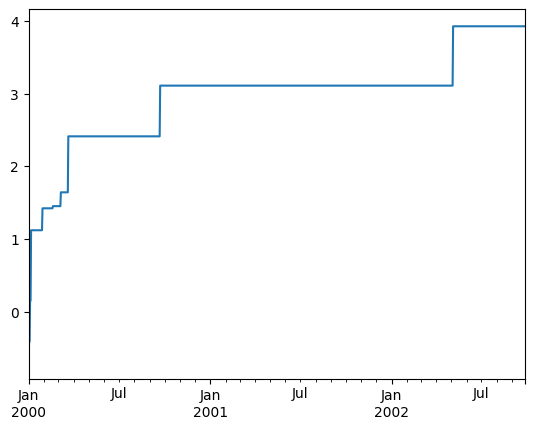

In [123]:
ps.options.plotting.backend = "matplotlib"

kser.plot()

**Gráficos de Pandas Bokeh**

**Gráfico por defecto con plotly**

En un DataFrame, el plot() es una conveniencia para trazar todas las columnas con etiquetas:

In [129]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [131]:
kdf = ps.from_pandas(pdf)

In [132]:
kdf = kdf.cummax()
kdf

,A,B,C,D
2000-01-01,0.610216,0.156973,-0.586531,0.224216
2000-01-02,0.714610,0.156973,1.159074,0.224216
2000-01-03,0.714610,1.197247,1.159074,0.224216
2000-01-04,0.714610,1.197247,1.734937,0.224216
2000-01-05,0.714610,1.197247,1.734937,0.224216
2000-01-06,0.714610,1.197247,1.734937,0.224216
2000-01-07,0.714610,1.197247,1.754933,0.224216
2000-01-08,0.714610,1.197247,1.754933,1.702515
2000-01-09,0.714610,1.631857,1.754933,1.818062
2000-01-10,0.775155,1.631857,1.754933,1.818062


### 6. Entrada / salida de datos


### CSV

CSV es sencillo y fácil de usar

In [137]:
kdf.to_pandas().to_csv('foo.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'foo.csv'

### Parquet

Parquet es un formato de archivo eficiente y compacto para leer y escribir más rápido.

In [ ]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

### Spark IO

Además, Koalas es totalmente compatible con las diversas fuentes de datos de Spark, como ORC y una fuente de datos externa.

In [ ]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)